# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/pedro/Documents/EBAC/9. Análise descritiva/ex1/previsao_de_renda.csv', sep=',')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
print(f'N de colunas: {df.shape[1]}')
df.head(3)

N de colunas: 15


,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98


In [3]:
df2 = df.copy()

## Variáveis que serão analisadas: posse_de_imovel, posse_de_veiculo
df2 = df2[['renda', 'posse_de_imovel', 'posse_de_veiculo', 'mau']]
df2.head(3)

,renda,posse_de_imovel,posse_de_veiculo,mau
0,3369.24,True,False,False
1,6096.14,True,True,False
2,5658.98,True,True,False


In [4]:
print(f'Variáveis de interesse não apresentam {df2.isna().sum().sum()} missing values')

Variáveis de interesse não apresentam 0 missing values


<AxesSubplot:>

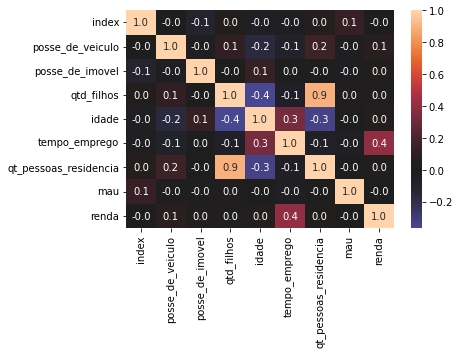

In [5]:
sns.heatmap(df.corr(), center = 0, annot=True, fmt='.1f')

Variáveis de interesse possuem pouca correlação com renda.

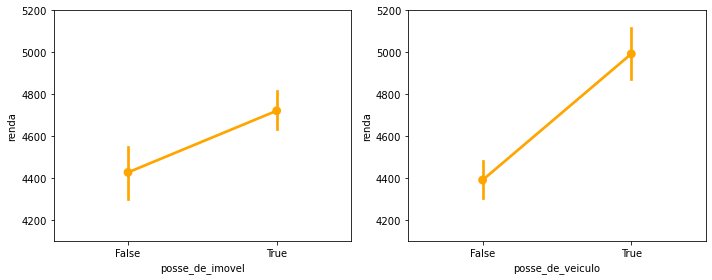

In [16]:
features = ['posse_de_imovel', 'posse_de_veiculo']

plt.figure(figsize=(10,4))
for i in range(0, len(features)):
    plt.subplot(1,2, i+1)
    sns.pointplot(data=df2, x=features[i], y='renda', color='orange')
    plt.xlabel(features[i])
    plt.ylim(4100, 5200)
    plt.tight_layout()

Clientes que possuem imóvel e veículo, em média, tem uma renda maior.

As variáveis de interesse possuem pouca correlação com renda, mas podem ajudar a comprender o perfil do cliente, afinal, quem tem uma renda maior possui imóvel e veículo.